# Comparison

In [50]:
import pandas as pd

In [51]:
demand_type = ['uniform', "seasonal", 'random']
opt_costs = [pd.read_csv('./'+demand+'/opt_cost.csv', index_col=0) for demand in demand_type]
base_costs = [pd.read_csv(demand+'/base_cost.csv', index_col=0) for demand in demand_type]

In [52]:
opt_costs = pd.concat(opt_costs, axis=1)
base_costs = pd.concat(base_costs, axis = 1)
opt_costs.columns = base_costs.columns = demand_type

<AxesSubplot:>

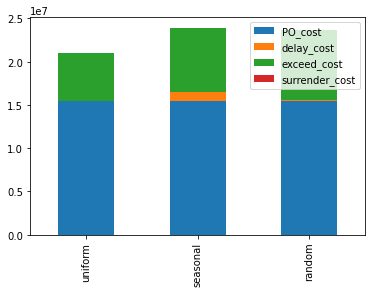

In [56]:
import seaborn as sns

opt_costs.T.plot(kind='bar', stacked=True)

<AxesSubplot:>

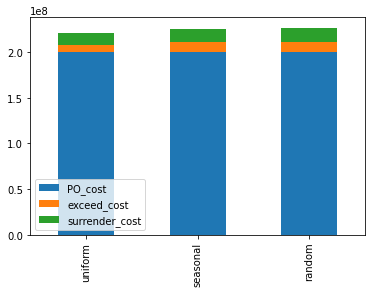

In [57]:
base_costs.T.plot(kind='bar', stacked=True)